# Profitable Algorithmic Trading

A trading algorithm that buys 100 shares of AMD stock on the days when the price decreases and that sells the accumulated shares on the last day of the trading period.

## Data Loading

### Step 1: Run the cells of this section to create the DataFrame with the AMD stock closing data.

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np

In [2]:
# Closing prices for AMD stock
amd_data = [28.99, 28.76, 28.31, 28.68, 29.01, 28.93, 28.23, 28.46, 28.38, 29.75,]

In [3]:
# Create the Pandas DataFrame using the price information supplied
amd_df = pd.DataFrame(
    {"close": amd_data}
)

# Set the index as datetime objects starting from 2019-09-09 and onwards (but only business days)
amd_df.index = pd.bdate_range(start='2019-09-30', periods=10)

# Review the DataFrame
amd_df

,close
2019-09-30,28.99
2019-10-01,28.76
2019-10-02,28.31
2019-10-03,28.68
2019-10-04,29.01
2019-10-07,28.93
2019-10-08,28.23
2019-10-09,28.46
2019-10-10,28.38
2019-10-11,29.75


<Axes: >

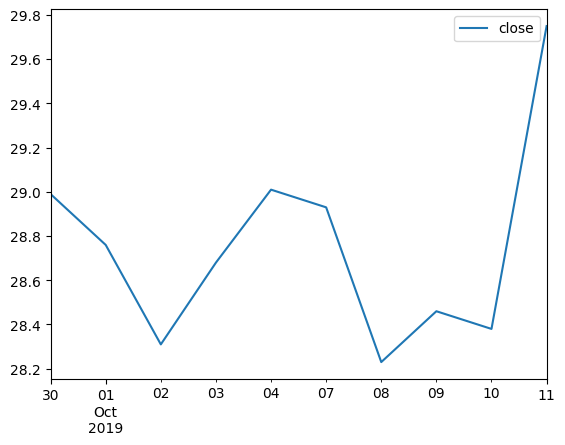

In [4]:
# Visualize the DataFrame using the plot function 
amd_df.plot()

## Trading Algorithm Definition

### Step 2: Using the starter code provided, change the algorithm by modifying the loop to include the cost and proceeds metrics for buys of 100 shares.

In [14]:
# Initialize trade_type column for buys and sells
amd_df['trade_type'] = np.nan

# Initialize variable to hold the previous_price
previous_price = 0

In [15]:
# Initialize a cost/proceeds column for recording trade metrics
amd_df['cost/proceeds'] = np.nan

# Initialize share_size equals 100 and accumulated_shares equals 0
share_size = 100
accumulated_shares = 0

### Change the loop to include the new trading rules that buys 100 shares of AMD stock on the days when the price decreases and that sells the accumulated shares on the last day of the trading period.

**Important:** Note that the current code includes the rules from the simple trading strategy that you created in the previous activity.

In [16]:
# Loop through the Pandas DataFrame and code the conditions of the trading strategy 
for index, row in amd_df.iterrows():
    current_price = row['close']
    
    # buy if the previous price is 0, in other words, buy on the first day
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
  
    if previous_price == 0:
        amd_df.loc[index, "trade_type"] = "buy"
        amd_df.loc[index, "cost/proceeds"] = -(current_price * share_size)
        accumulated_shares += share_size
    # buy if the current day price is less than the previous day price
    # set the cost/proceeds column equal to the negative value of the row close price
    # multiplied by the share_size
        
    
    elif row["close"] < previous_price:
        amd_df.loc[index, "trade_type"] = "buy"
        amd_df.loc[index, "cost/proceeds"] = -(current_price * share_size)
        accumulated_shares += share_size

    # sell if the current day price is greater than the previous day price
    elif row["close"] > previous_price:
        amd_df.loc[index, "trade_type"] = "sell"

    # else hold if the current day price is equal to the previous day price
    else:
        amd_df.loc[index, "trade_type"] = "hold"
    
    # set the previous_price variable to the close price of the current row
    previous_price = row["close"]

    # if the index is the last index of the Dataframe, sell
    # set the cost/proceeds column equal to the row close price multiplied 
    # by the accumulated_shares

    if index == amd_df.index[-1]:
        amd_df.loc[index, "trade_type"] = "sell"
        amd_df.loc[index, "cost/proceeds"] = (current_price * accumulated_shares)

## Profitability Assessment

### Step 3: Run the updated algorithm. Then review the “cost/proceeds” column in the resulting DataFrame to confirm two results.

In [17]:
# Run the algorithm and review the DataFrame
amd_df

,close,trade_type,cost/proceeds
2019-09-30,28.99,buy,-2899.0
2019-10-01,28.76,buy,-2876.0
2019-10-02,28.31,buy,-2831.0
2019-10-03,28.68,sell,NaN
2019-10-04,29.01,sell,NaN
2019-10-07,28.93,buy,-2893.0
2019-10-08,28.23,buy,-2823.0
2019-10-09,28.46,sell,NaN
2019-10-10,28.38,buy,-2838.0
2019-10-11,29.75,sell,17850.0


### Step 4: Calculate the total profit or loss for the trading algorithm by summing the values in the "cost/proceeds" column. Print the value of the total profit or loss from the trades.

In [18]:
# Calculate the total profit/loss for 100 share size orders
total_profit = round(amd_df['cost/proceeds'].sum(), 2)

# Print the profit/loss metrics
print(f"The total profit/loss of the trading strategy is ${total_profit}")

The total profit/loss of the trading strategy is $690.0


### Step 5: Calculate the ROI for the trades.

In [19]:
# Calculate the invested capital by adding the cost of all buy trades
invested_capital = 0
for index, row in amd_df.iterrows(): 
    if row['trade_type'] == "buy": 
        invested_capital = invested_capital + row['cost/proceeds']

In [20]:
# Calculate the return on investment (ROI)
roi = round((total_profit / (-invested_capital)) * 100, 2)
# Print the ROI
print(f"The trading algorithm resulted in a return on investment of {roi}%")

The trading algorithm resulted in a return on investment of 4.02%
